In [13]:
import numpy as np
from matplotlib import pyplot as plt
from numpy import linalg
plt.style.use('dark_background')

In [14]:
h = 0.1
lx, ly = np.pi, np.pi
nx, ny = int(np.round(lx/h)), int(np.round(ly/h))
hx, hy = lx/nx, ly/ny
x = np.linspace(0.5*hx, lx-0.5*hx, nx)
y = np.linspace(0.5*hy, ly-0.5*hy, ny)
X, Y = np.meshgrid(x, y, indexing='ij')

In [15]:
def exact(x, y):
    return np.exp(-np.cos(2*x))*np.sin(2*y)

def RHS(X, Y):
    return np.exp(-np.cos(2*X))*np.sin(2*Y)*(2*np.cos(2*X)-1)**2

def OpL(u, hx, hy):
    res = np.zeros_like(u)
    res[1:, :] += (u[1:, :]-u[:-1, :])/hx**2
    res[:-1, :] += (u[:-1, :]-u[1:, :])/hx**2
    res[:, 1:] += (u[:, 1:]-u[:, :-1])/hy**2
    res[:, :-1] += (u[:, :-1]-u[:, 1:])/hy**2
    res[0, :] += (u[0, :]-u[-1, :])/hx**2
    res[-1, :] += (u[-1, :]-u[0, :])/hx**2
    res[:, 0] += (u[:, 0]-u[:, -1])/hy**2
    res[:, -1] += (u[:, -1]-u[:, 0])/hy**2
    res += u
    return res

In [16]:
u1 = np.zeros_like(X)
u11 = u1+2e-10
t = h**2/4
# err = []
while np.max(np.abs(u1-u11)) > 1e-10:
    u11 = u1.copy()
    u1 += t*(RHS(X, Y)-OpL(u1, hx, hy))
    # err.append(np.max(np.abs(u1-exact(X, Y))))

In [17]:
# plt.plot(range(1000), err)

In [18]:
u2 = np.zeros_like(X)
F = RHS(X, Y)
r = OpL(u2, hx, hy)-F
err = []
ex = exact(X, Y)
i = 1
while np.abs((r**2).sum() > 1e-5):
    OpLr = OpL(r, hx, hy)
    OpLu = OpL(u2, hx, hy)
    u2 += np.sum(OpLr*r)/np.linalg.norm(OpLr)**2*(F-OpLu)
    r = OpLu-F
    # err.append(np.max(np.abs(u2-ex)))
    # i += 1

In [88]:
# plt.plot(range(len(err)), err)

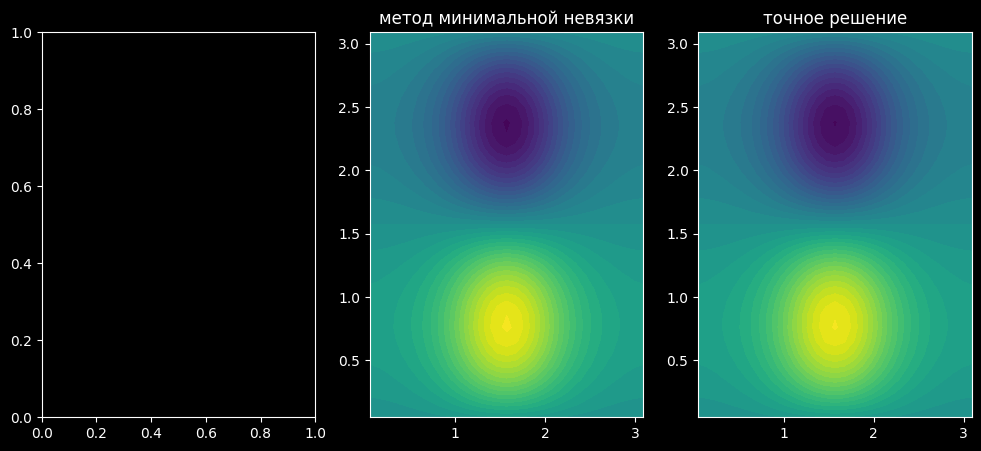

In [19]:
fig, ax = plt.subplots(1, 3, figsize=(12, 5))
# ax[0].contourf(X, Y, u1, levels=50)
# ax[0].set_title('метод простых итераций')
ax[1].contourf(X, Y, u2, levels=50)
ax[1].set_title('метод минимальной невязки')
ax[2].contourf(X, Y, exact(X, Y), levels=50)
ax[2].set_title('точное решение')
plt.show()

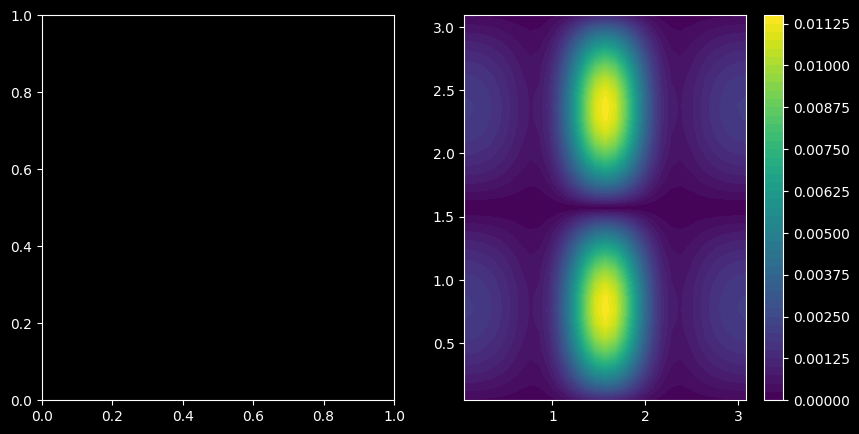

In [20]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
# ax0 = ax[0].contourf(X, Y, np.abs(u1-exact(X, Y)), levels=50)
ax1 = ax[1].contourf(X, Y, np.abs(u2-exact(X, Y)), levels=50)
# fig.colorbar(ax0, ax=ax[0]);
fig.colorbar(ax1, ax=ax[1]);

In [21]:
err = []
for hi in [0.5, 0.1, 0.05, 0.01]:
    nxi, nyi = int(np.round(lx/hi)), int(np.round(ly/hi))
    hxi, hyi = lx/nxi, ly/nyi
    xi = np.linspace(0.5*hxi, lx-0.5*hxi, nxi)
    yi = np.linspace(0.5*hyi, ly-0.5*hyi, nyi)
    Xi, Yi = np.meshgrid(xi, yi, indexing='ij')
    ui = np.zeros_like(Xi)
    F = RHS(Xi, Yi)
    ri = OpL(ui, hxi, hyi)-F
    
    while np.abs((ri**2).sum() > 1e-5):
        OpLr = OpL(ri, hxi, hyi)
        OpLu = OpL(ui, hxi, hyi)
        ui += np.sum(OpLr*ri)/np.linalg.norm(OpLr)**2*(F-OpLu)
        ri = OpLu-F
        
    err.append(np.max(np.abs(ui-exact(Xi, Yi))))

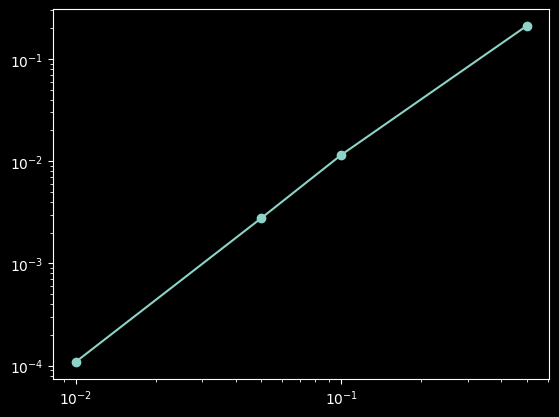

In [23]:
plt.loglog([0.5, 0.1, 0.05, 0.01], err, marker='o');